In [6]:
import numpy as np
import pandas as pd
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.layers import Flatten

In [2]:
top_words = 10000
(x_train,y_train), (x_test, y_test) = imdb.load_data(num_words = top_words)

17465344/17464789 [==============================] - 3s 0us/step


In [5]:
max_review_length = 500
x_train = sequence.pad_sequences(x_train, maxlen = max_review_length )
x_test = sequence.pad_sequences(x_test,maxlen = max_review_length)

In [7]:
embedding_vector_length = 32
model = Sequential()
model.add(Embedding(top_words,embedding_vector_length, input_length = max_review_length))
model.add(Flatten())
model.add(Dense(16,activation = 'relu'))
model.add(Dense(16,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy',optimizer= 'adam',metrics = ['accuracy'])
print(model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           320000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                256016    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 576,305
Trainable params: 576,305
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
hist = model.fit(x_train,y_train, validation_data = (x_test,y_test), epochs = 5, batch_size = 128)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:414: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 8s 318us/step - loss: 0.5355 - accuracy: 0.6940 - val_loss: 0.3253 - val_accuracy: 0.8608
Epoch 2/5
25000/25000 [==============================] - 7s 293us/step - loss: 0.1847 - accuracy: 0.9316 - val_loss: 0.2989 - val_accuracy: 0.8768
Epoch 3/5
25000/25000 [==============================] - 7s 282us/step - loss: 0.0586 - accuracy: 0.9844 - val_loss: 0.3544 - val_accuracy: 0.8719
Epoch 4/5
25000/25000 [==============================] - 8s 316us/step - loss: 0.0131 - accuracy: 0.9978 - val_loss: 0.4249 - val_accuracy: 0.8705
Epoch 5/5
25000/25000 [==============================] - 10s 403us/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.4843 - val_accuracy: 0.8690


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

[]

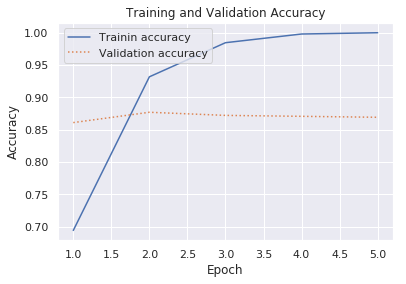

In [17]:
sns.set()
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'-',label = 'Trainin accuracy')
plt.plot(epochs,val,':',label = 'Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc = 'upper left')
plt.plot()

In [18]:
scores = model.evaluate(x_test,y_test,verbose = 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.90%


In [40]:
import string
word_dict = imdb.get_word_index()
def analyze(text):
    translator = str.maketrans('','',string.punctuation)
    text = text.translate(translator)
    text = text.lower().split(' ')
    text = [word for word in text if word.isalpha()]
    input = [1]
    for word in text:
        if word in word_dict and word_dict[word] < top_words:
            input.append(word_dict[word])
        else:
            input.append(2)
    padded_input = sequence.pad_sequences([input],maxlen = max_review_length)
    result = model.predict(np.array([padded_input][0]))[0][0]
    return result

In [42]:
res = analyze('It was amazing')
print(res)

0.7033844
